In [95]:
#Import section
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf

import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling1D, MaxPooling2D, AveragePooling2D, BatchNormalization, Reshape
from keras.optimizers import Adam, SGD, RMSprop

import matplotlib.pyplot as plt
from IPython.display import clear_output

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.0
Num GPUs Available:  1


In [96]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [97]:
#Load Data
def load_data(roi):
    #Load data
    fname = 'dataset\kay_images.npz'
    with np.load(fname) as dobj:
        dat = dict(**dobj)

    #Load data labels
    labels = np.load('dataset\kay_labels.npy')
    val_labels = np.load('dataset\kay_labels_val.npy')


    roi_idx = dat["roi_names"].tolist().index(roi)


    trainX = dat["responses"]
    trainX = np.array([responses[dat["roi"] == roi_idx] for responses in trainX])
    trainY = labels[0,:]
    trainY = np.array([0 if label == "animal" else 1 for label in trainY])

    testX = dat["responses_test"]
    testX = np.array([responses[dat["roi"] == roi_idx] for responses in testX])
    testY = val_labels[0,:]
    testY = np.array([0 if label == "animal" else 1 for label in testY])

    # trainX = np.array([normalizeData(data) for data in trainX])
    # valX = np.array([normalizeData(data) for data in valX])
    # testX = np.array([normalizeData(data) for data in testX])

    print(trainX.shape)
    #print(len(trainY))

    print(testX.shape)
    #print(len(testY))

    return trainX, trainY, testX, testY

In [98]:
#Model 1
def define_model(input_shape):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [99]:
#Model 2
def define_model_2(input_shape):
    model = Sequential()

    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='softmax'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [100]:
#Model 3
def define_model_3(input_shape):
    model = Sequential()

    model.add(Dense(128, activation='sigmoid', input_shape=(input_shape,)))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [101]:
#Model 4
def define_model_4(input_shape):
    model = Sequential()

    model.add(Dense(128, activation='sigmoid', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [102]:
#Model 5
def define_model_5(input_shape):
    model = Sequential()

    model.add(Dense(64, activation='sigmoid', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [103]:
#Model 6 == Model 2
def define_model_6(input_shape):
    model = Sequential()

    model.add(Dense(32, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))

    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))

    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [104]:
#Model 7 == Model 3
def define_model_7(input_shape):
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))

    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))

    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))

    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer='adam', 
        #loss='sparse_categorical_crossentropy',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [ ]:
#Model 8 == Model 1
def define_model_8(input_shape):
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', 
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [ ]:
def run_model(roi):
    print(f"Model for ROI - {roi}")
    print("Run Model")
    trainX, trainY, testX, testY = load_data(roi)
    model = define_model_8(trainX.shape[1])
    print("Train...")
    callbacks_list = [PlotLearning()]

    #100 #64 #shuffle=True

    model.fit(trainX, trainY, epochs=500, batch_size=8 ,validation_split=0.2, verbose=1, shuffle=True, callbacks=callbacks_list)
    
    loss, acc = model.evaluate(testX, testY, verbose=2)
    print(loss, acc)
    
    model.summary()
    #model.save(f'classification_{roi}_V2.keras')


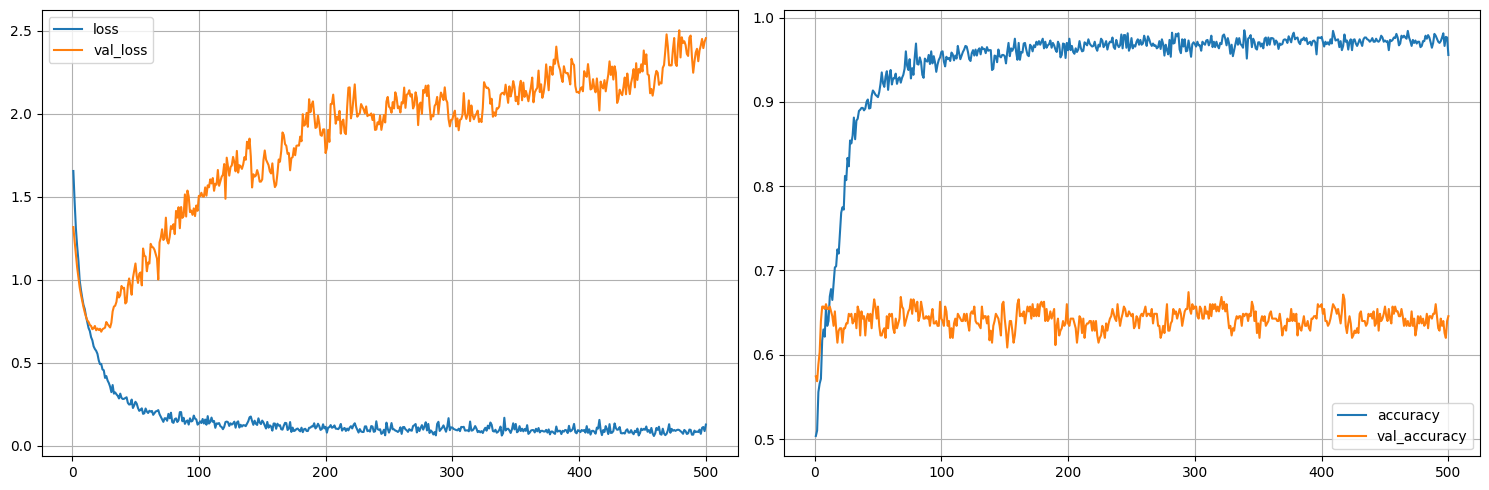

88/88 [==============================] - 2s 18ms/step - loss: 0.1287 - accuracy: 0.9557 - val_loss: 2.4548 - val_accuracy: 0.6457
4/4 - 0s - loss: 1.5594 - accuracy: 0.6250 - 36ms/epoch - 9ms/step
1.5593838691711426 0.625
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 16)                28656     
                                                                 
 batch_normalization_74 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_74 (Dropout)        (None, 16)                0         
                                                                 
 dense_102 (Dense)           (None, 8)                 136       
                                                                 
 batch_normalization_75 (Bat 

In [120]:
# load_data('V1')
# load_data('V2')
# load_data('V3')
# load_data('V4')
run_model('V3')
#run_model_all()